In [57]:
# Exploratory Analysis of JEE dataset
### In other I'll just check all of my batchmate's marks in IIT-JEE 

In [58]:
#Import important libraries
library(ggplot2)
library(dplyr)
library(tidyr)


In [59]:
#Check out the structure of the data
df <- read.csv("data/jee2009.csv",stringsAsFactors=F)
str(df)
head(df)
#Total of around 4 lakh people appeared for the exam

'data.frame':	384977 obs. of  11 variables:
 $ REGST_NO    : int  2045263 2023172 2040146 2032358 2078152 2057352 2059321 2055376 2091101 2066060 ...
 $ NAME        : chr  "VIBHU PAL" "NITESH BHARDWAJ" "MANJEET" "SHIKHAR DATTA" ...
 $ category    : chr  "GE" "GE" "GE" "GE" ...
 $ sub_category: chr  "NN" "NN" "NN" "NN" ...
 $ GENDER      : chr  "M" "M" "M" "M" ...
 $ PIN_RES     : chr  "208011" "110046" "110085" "110075" ...
 $ PARENT_NAM  : chr  "SAROJ KUMAR PAL" "OM PRAKASH BHARDWAJ" "DEVENDER SINGH" "SUNIL KUMAR DATTA" ...
 $ math        : int  30 38 29 6 11 8 8 19 16 35 ...
 $ phys        : int  33 26 10 -8 -4 8 44 54 -4 38 ...
 $ chem        : int  26 33 30 12 -9 20 47 49 20 39 ...
 $ mark        : int  89 97 69 10 -2 36 99 122 32 112 ...


REGST_NO,NAME,category,sub_category,GENDER,PIN_RES,PARENT_NAM,math,phys,chem,mark
2045263,VIBHU PAL,GE,NN,M,208011,SAROJ KUMAR PAL,30,33,26,89
2023172,NITESH BHARDWAJ,GE,NN,M,110046,OM PRAKASH BHARDWAJ,38,26,33,97
2040146,MANJEET,GE,NN,M,110085,DEVENDER SINGH,29,10,30,69
2032358,SHIKHAR DATTA,GE,NN,M,110075,SUNIL KUMAR DATTA,6,-8,12,10
2078152,RAJAT,GE,NN,M,121001,RAJESHWAR SINGH,11,-4,-9,-2
2057352,PRIYANK KUMAR,SC,NN,M,121003,PADAM CHAND,8,8,20,36


In [60]:
# Lets give a rank to these people. For now I'll give the same rank for reptitions.
df$jee_basic_rank <-df %>% 
                    select(mark) %>%
                    desc()%>%
                    row_number()
df %>%
arrange(jee_basic_rank)%>%
head(10)

REGST_NO,NAME,category,sub_category,GENDER,PIN_RES,PARENT_NAM,math,phys,chem,mark,jee_basic_rank
2076372,NITIN JAIN,GE,NN,M,121001,NEM CHAND JAIN,153,149,122,424,1
1156155,SHUBHAM TULSIANI,GE,NN,M,342003,KISHAN LAL TULSIANI,149,148,120,417,2
6004088,GOPI SIVAKANTH,ON,NN,M,533429,GOPI SRINIVAS,143,144,126,413,3
1070200,SHAH PARARTH PARESH,GE,NN,M,400057,SHAH PARESH VIKRAM,136,156,117,409,4
6128176,PRASHANT V,GE,NN,M,600004,VASUDEVAN R,141,151,115,407,5
1067197,PRIYANK PRADEEP PARIKH,GE,NN,M,400058,PRADEEP KISHORKANT PARIKH,153,154,97,404,6
1135360,NITISH JHAWA R,GE,NN,M,143006,KAMAL KISHORE JHAWAR,151,127,118,396,7
6006189,M PRANAY KUMAR,ON,NN,M,509216,M BALAKRISHNA,117,149,120,386,8
1134063,ANVIT SINGH TAWAR,GE,NN,M,390004,DEVENDRA SINGH TAWAR,156,124,105,385,9
1177388,KAPIL DUBEY,GE,NN,M,470002,RAJKUMAR DUBEY,132,146,106,384,10


In [61]:
#Let's have a look at the people in extreme end of the bell curve
extremes_df <- df %>%
               filter(math==max(math)) # maths champ
extremes_df <- df %>%
               filter(phys==max(phys))%>%
               bind_rows(extremes_df) #physics champ
extremes_df <- df %>%
               filter(chem==max(chem))%>%
               bind_rows(extremes_df) #chemistry champ
extremes_df <- df %>%
               filter(mark==max(mark))%>%
               bind_rows(extremes_df) #overall champ
extremes_df %>% arrange(desc(mark))
#Damn, wonder what these people are upto now

REGST_NO,NAME,category,sub_category,GENDER,PIN_RES,PARENT_NAM,math,phys,chem,mark,jee_basic_rank
2076372,NITIN JAIN,GE,NN,M,121001,NEM CHAND JAIN,153,149,122,424,1
1070200,SHAH PARARTH PARESH,GE,NN,M,400057,SHAH PARESH VIKRAM,136,156,117,409,4
1134063,ANVIT SINGH TAWAR,GE,NN,M,390004,DEVENDRA SINGH TAWAR,156,124,105,385,9
1067307,ABHISHEK PADMANABHAN,GE,NN,M,400607,S PADMANABHAN,132,118,132,382,13
1169264,HIMANSHU SHEKHAR,GE,NN,M,848502,HARENDRA KUMAR SINGH,99,121,132,352,90


In [62]:
#I'll just check my details
my_marks <- df %>% 
            filter(NAME=="ARAVIND B ATREYA")
my_marks
#Well actually my rank was 2536

REGST_NO,NAME,category,sub_category,GENDER,PIN_RES,PARENT_NAM,math,phys,chem,mark,jee_basic_rank
6017173,ARAVIND B ATREYA,GE,NN,M,500013,B K NAGARAJA RAO,100,67,72,239,2491


In [63]:
#And a few friends of mine
friends_df <- df %>%
              filter(NAME=="V S R VIKRAM")
friends_df <- df %>%
              filter(row_number()==grep("*SANJAY DIXIT*",df$NAME,ignore.case=TRUE))%>%
              bind_rows(friends_df)
friends_df <- df %>%
              filter(row_number()==grep("*RACHIT KOTHARI*",df$NAME,ignore.case=TRUE))%>%
              bind_rows(friends_df)
friends_df

REGST_NO,NAME,category,sub_category,GENDER,PIN_RES,PARENT_NAM,math,phys,chem,mark,jee_basic_rank
1163191,RACHIT KOTHARI,GE,NN,M,302003,RAJKUMAR KOTHARI,94,71,81,246,2181
6088037,SANJAY DIXIT BHUVANAGIRI,GE,NN,M,530003,B V H N SAINATH,124,111,66,301,515
6024209,V S R VIKRAM,GE,NN,M,500028,V SITARAMAM,67,100,99,266,1325


In [64]:
#Visualizations
#Tidying up data for visualizations, it will be easy to plot if all the marks are in rows as opposed to columns
df_transform <-gather(df,subject,marks,math:mark)

#Function for changing the names of the subjects, so that its more understandable in the plots
subject_names <- function(x){
    if(x=="math"){
        x<-"Mathematics"
    } else if(x=="chem") {
        x<-"Chemistry"
    } else if(x=="phys") {
        x<-"Physics"
    } else {
        x<-"Total"
    }
}

df_transform$subject <- sapply(df_transform$subject,subject_names)
head(df_transform)
#entries in original dataset
nrow(df)
#entries for each subject
df_transform %>%
group_by(subject)%>%
summarize(counts=n())

REGST_NO,NAME,category,sub_category,GENDER,PIN_RES,PARENT_NAM,jee_basic_rank,subject,marks
2045263,VIBHU PAL,GE,NN,M,208011,SAROJ KUMAR PAL,36787,Mathematics,30
2023172,NITESH BHARDWAJ,GE,NN,M,110046,OM PRAKASH BHARDWAJ,31862,Mathematics,38
2040146,MANJEET,GE,NN,M,110085,DEVENDER SINGH,53585,Mathematics,29
2032358,SHIKHAR DATTA,GE,NN,M,110075,SUNIL KUMAR DATTA,221578,Mathematics,6
2078152,RAJAT,GE,NN,M,121001,RAJESHWAR SINGH,288710,Mathematics,11
2057352,PRIYANK KUMAR,SC,NN,M,121003,PADAM CHAND,112143,Mathematics,8


[1] 384977

subject,counts
Chemistry,384977
Mathematics,384977
Physics,384977
Total,384977


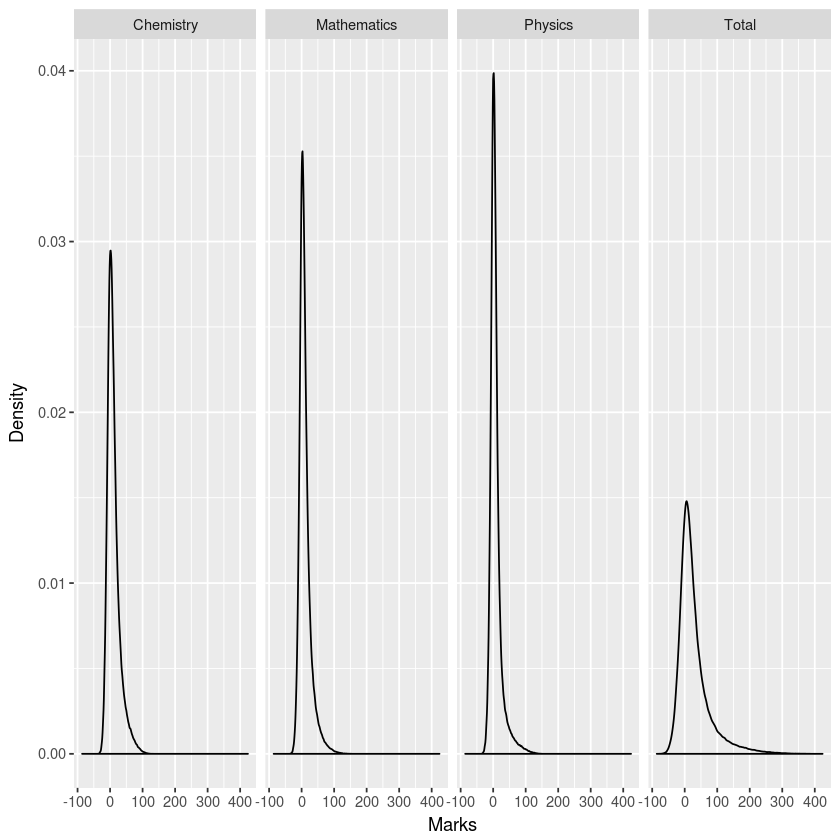

In [65]:
#Let the plotting begin
plot_obj <- ggplot(data=df_transform,aes(x=marks))+
            geom_density()+
            facet_grid(.~subject)+
            labs(x="Marks",y="Density")
plot_obj


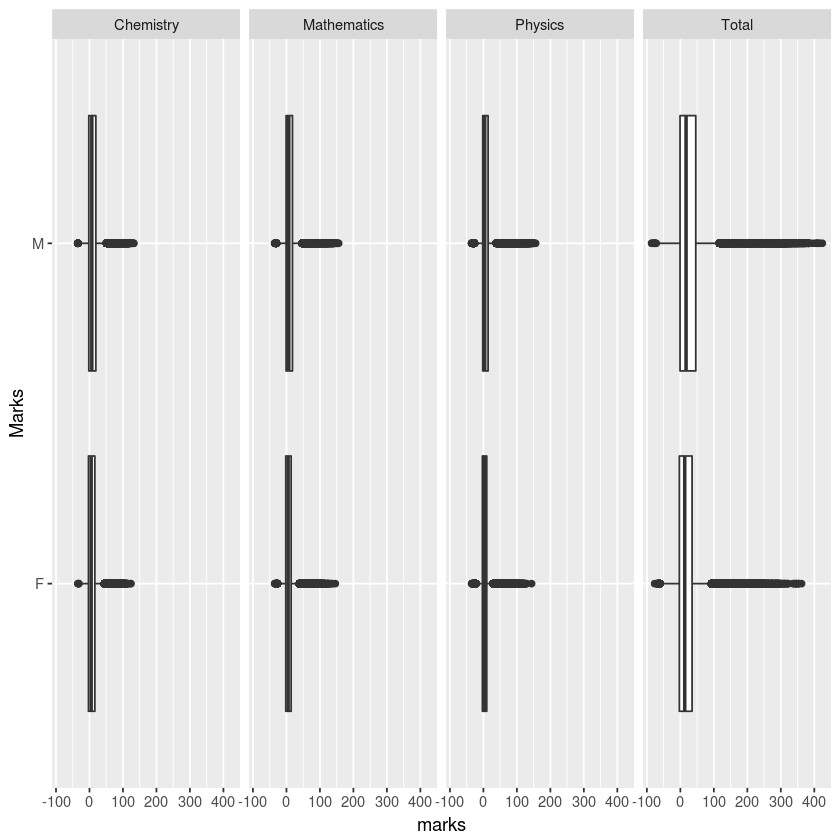

In [66]:
#Compare boxplots Males vs Females
#Remove a few entries wit no GENDER
df_transform <- df_transform %>%
                filter(GENDER!="")
plot_obj <- ggplot(data=df_transform,aes(x=GENDER,y=marks))+
                geom_boxplot()+
                coord_flip()+
                facet_grid(.~subject)+
                labs(x="Marks")
plot_obj
